Laboratorio 3

Alejandra Guzman 20262

Jorge Caballeros 20009


General Setup

In [16]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
from datetime import datetime

data = pd.read_csv('monthly-sunspots.csv')
# Creating new columns
date = [datetime.strptime(x, '%Y-%m') for x in data['Month']]
Year = [x.year for x in date]
Month = [x.month for x in date]

data['Year'] = Year
data['month'] = Month

data = data.drop(columns=['Month'])

data

,Sunspots,Year,month
0,58.0,1749,1
1,62.6,1749,2
2,70.0,1749,3
3,55.7,1749,4
4,85.0,1749,5
...,...,...,...
2815,71.8,1983,8
2816,50.3,1983,9
2817,55.8,1983,10
2818,33.3,1983,11


Splitting the data

In [17]:
split_point = int(len(data)*0.8)

train_data = data[:split_point]
test_data = data[split_point:]

Normalizing with minmax scaling 

In [18]:
min = data['Sunspots'].min()
max = data['Sunspots'].max()

scaled_data = [ (x - min) / (max - min) for x in data['Sunspots']]

data['Scaled_sunspots'] = scaled_data
data.drop('Sunspots', axis=1, inplace=True)
data

,Year,month,Scaled_sunspots
0,1749,1,0.228526
1,1749,2,0.246651
2,1749,3,0.275808
3,1749,4,0.219464
4,1749,5,0.334909
...,...,...,...
2815,1983,8,0.282900
2816,1983,9,0.198188
2817,1983,10,0.219858
2818,1983,11,0.131206


Splitting the data

In [19]:
split_point = int(len(data)*0.8)

train_data = data[:split_point]
test_data = data[split_point:]


# Feed Forward NN

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(32, activation='relu', input_shape=(train_data.shape[1]-1,)),  # -1 because we exclude the target column
    Dense(16, activation='relu'),
    Dense(1)  # No activation for the output layer in regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print a summary of the model's architecture
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                96        
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


Training

In [21]:
# Separate input features and target variable for training data
X_train = train_data.drop(columns=['Scaled_sunspots'])
y_train = train_data['Scaled_sunspots']

# Separate input features and target variable for testing data
X_test = test_data.drop(columns=['Scaled_sunspots'])
y_test = test_data['Scaled_sunspots']

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))


Epoch 1/50


71/71 [==============================] - 1s 5ms/step - loss: 53285.5664 - val_loss: 242.3605
Epoch 2/50
71/71 [==============================] - 0s 2ms/step - loss: 17.4231 - val_loss: 0.2322
Epoch 3/50
71/71 [==============================] - 0s 2ms/step - loss: 0.1201 - val_loss: 0.1448
Epoch 4/50
71/71 [==============================] - 0s 2ms/step - loss: 0.1094 - val_loss: 0.1461
Epoch 5/50
71/71 [==============================] - 0s 2ms/step - loss: 0.1093 - val_loss: 0.1468
Epoch 6/50
71/71 [==============================] - 0s 2ms/step - loss: 0.1086 - val_loss: 0.1444
Epoch 7/50
71/71 [==============================] - 0s 2ms/step - loss: 0.1081 - val_loss: 0.1423
Epoch 8/50
71/71 [==============================] - 0s 2ms/step - loss: 0.1076 - val_loss: 0.1395
Epoch 9/50
71/71 [==============================] - 0s 2ms/step - loss: 0.1071 - val_loss: 0.1396
Epoch 10/50
71/71 [==============================] - 0s 2ms/step - loss: 0.1065 - val_loss: 0.1374
Epoch 11/50
71/71 [====

# LSTM and RNN 

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM



# Load dataset
df_sunspots = pd.read_csv("monthly-sunspots.csv")
df_sunspots.head()


,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0


In [23]:

df_sunspots.describe()


,Sunspots
count,2820.000000
mean,51.265957
std,43.448971
min,0.000000
25%,15.700000
50%,42.000000
75%,74.925000
max,253.800000


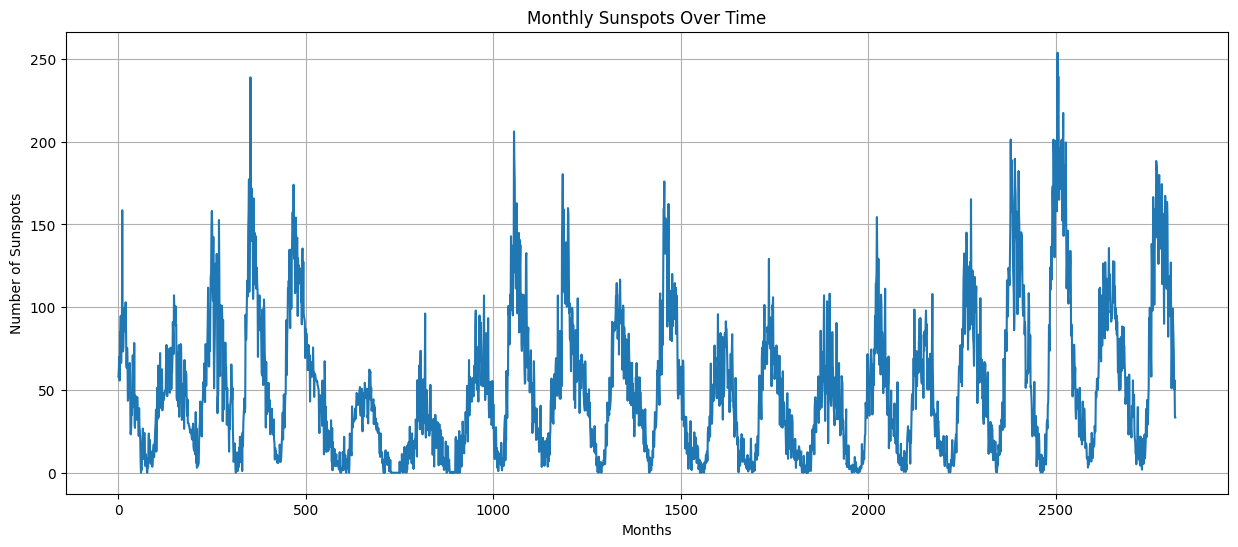

In [24]:
plt.figure(figsize=(15,6))
plt.plot(df_sunspots['Sunspots'])
plt.title('Monthly Sunspots Over Time')
plt.xlabel('Months')
plt.ylabel('Number of Sunspots')
plt.grid(True)
plt.show()

In [25]:

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_sunspots['Sunspots'].values.reshape(-1, 1))

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

#se crea el dataset de entrenamiento y test
train_size = int(len(scaled_data) * 0.67)
test_size = len(scaled_data) - train_size
train, test = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]

#datasets 
look_back = 12  
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

trainX.shape, trainY.shape, testX.shape, testY.shape

((1877, 1, 12), (1877,), (919, 1, 12), (919,))

Entrenamiento en X cotendra 1877 muestras, 1 paso de tiempo y 12 caracteristicas, mientras que en y contendra 1877 valores.
Para prueba en X tendremos 919 muestras, 1 paso de tiempo y 12 caracteristicas, mientras que en y tendremos 919 valores.

MODELO RNN

In [26]:

rnn_model = Sequential()
rnn_model.add(SimpleRNN(4, input_shape=(1, look_back))) 
rnn_model.add(Dense(1))
rnn_model.compile(loss='mean_squared_error', optimizer='adam')


rnn_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 4)                 68        
                                                                 
 dense_15 (Dense)            (None, 1)                 5         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


MODELO LSTM

In [27]:
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(1, look_back)))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')

lstm_model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                12600     
                                                                 
 dense_16 (Dense)            (None, 1)                 51        
                                                                 
Total params: 12,651
Trainable params: 12,651
Non-trainable params: 0
_________________________________________________________________


Entrenamiento de ambos modelos.

In [28]:
rnn_model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)
lstm_model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)

Epoch 1/50


1877/1877 - 3s - loss: 0.0086 - 3s/epoch - 1ms/step
Epoch 2/50
1877/1877 - 2s - loss: 0.0048 - 2s/epoch - 1ms/step
Epoch 3/50
1877/1877 - 2s - loss: 0.0041 - 2s/epoch - 986us/step
Epoch 4/50
1877/1877 - 2s - loss: 0.0038 - 2s/epoch - 1ms/step
Epoch 5/50
1877/1877 - 2s - loss: 0.0038 - 2s/epoch - 991us/step
Epoch 6/50
1877/1877 - 2s - loss: 0.0037 - 2s/epoch - 988us/step
Epoch 7/50
1877/1877 - 2s - loss: 0.0037 - 2s/epoch - 995us/step
Epoch 8/50
1877/1877 - 2s - loss: 0.0037 - 2s/epoch - 991us/step
Epoch 9/50
1877/1877 - 2s - loss: 0.0036 - 2s/epoch - 991us/step
Epoch 10/50
1877/1877 - 2s - loss: 0.0037 - 2s/epoch - 985us/step
Epoch 11/50
1877/1877 - 2s - loss: 0.0036 - 2s/epoch - 987us/step
Epoch 12/50
1877/1877 - 2s - loss: 0.0036 - 2s/epoch - 982us/step
Epoch 13/50
1877/1877 - 2s - loss: 0.0037 - 2s/epoch - 987us/step
Epoch 14/50
1877/1877 - 2s - loss: 0.0036 - 2s/epoch - 974us/step
Epoch 15/50
1877/1877 - 2s - loss: 0.0036 - 2s/epoch - 983us/step
Epoch 16/50
1877/1877 - 2s - loss: 0

In [29]:
rnn_train_score = rnn_model.evaluate(trainX, trainY, verbose=0)
rnn_test_score = rnn_model.evaluate(testX, testY, verbose=0)
print(f'RNN - Train Score: {rnn_train_score}, Test Score: {rnn_test_score}')

lstm_train_score = lstm_model.evaluate(trainX, trainY, verbose=0)
lstm_test_score = lstm_model.evaluate(testX, testY, verbose=0)
print(f'LSTM - Train Score: {lstm_train_score}, Test Score: {lstm_test_score}')

RNN - Train Score: 0.003382677910849452, Test Score: 0.00471874512732029
LSTM - Train Score: 0.003484765999019146, Test Score: 0.004760992247611284


# Discusion

### Red Neuronal Densa (Feed-forward):
**Pros**:
- **Simplicidad**: Requiere menos tiempo de entrenamiento debido a su estructura directa.
  
**Contras**:
- **Sin Memoria Temporal**: No es ideal para secuencias temporales ya que no recuerda estados anteriores.

### Red Neuronal Recurrente (RNN):
**Pros**:
- **Memoria Temporal**: Adecuada para secuencias temporales al recordar estados anteriores.
  
**Contras**:
- **Gradiente Desvaneciente**: Las RNN pueden tener dificultades para aprender dependencias a largo plazo debido a este problema.

### LSTM (Long Short-Term Memory):
**Pros**:
- **Aprendizaje a Largo Plazo**: Diseñadas para evitar el problema del gradiente desvaneciente, capturando así dependencias temporales a largo plazo en los datos.
  
**Contras**:
- **Complejidad**: Tienen más parámetros que las RNN y, por lo tanto, pueden ser más lentas de entrenar.

## Conclusión:
Para datos temporales, como manchas solares, las LSTMs son generalmente preferidas debido a su capacidad para manejar dependencias a largo plazo. Sin embargo, siempre es crucial considerar los resultados reales obtenidos con cada arquitectura en el conjunto de datos específico. Por lo tanto, la **LSTM** sería la elección teórica para esta tarea, pero se recomienda revisar el rendimiento empírico.